In [6]:
import pandas as pd
data=pd.read_csv('mydatac.csv')
data.fillna(data.mean(), inplace=True)
data.ffill(inplace=True)
data.fillna(data.mean(), inplace=True)

In [8]:
X = data.drop(columns=['Power'])
y = data['Power']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import catboost
from catboost import CatBoostClassifier, CatBoostRegressor
from catboost import CatBoostRegressor
# Initialize CatBoost model
model = CatBoostRegressor(verbose=100, iterations=1000, learning_rate=0.1)

# Fit the model
model.fit(X_train, y_train)

0:	learn: 0.0053088	total: 179ms	remaining: 2m 59s
100:	learn: 0.0001170	total: 849ms	remaining: 7.55s
200:	learn: 0.0000899	total: 1.44s	remaining: 5.74s
300:	learn: 0.0000810	total: 2.02s	remaining: 4.7s
400:	learn: 0.0000767	total: 2.62s	remaining: 3.91s
500:	learn: 0.0000743	total: 3.2s	remaining: 3.19s
600:	learn: 0.0000729	total: 3.79s	remaining: 2.51s
700:	learn: 0.0000720	total: 4.36s	remaining: 1.86s
800:	learn: 0.0000715	total: 4.94s	remaining: 1.23s
900:	learn: 0.0000711	total: 5.51s	remaining: 606ms
999:	learn: 0.0000708	total: 6.08s	remaining: 0us


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 3.456425756143719e-09
Mean Absolute Error: 2.2103526877398923e-05
R² Score: 0.9998986582387154


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


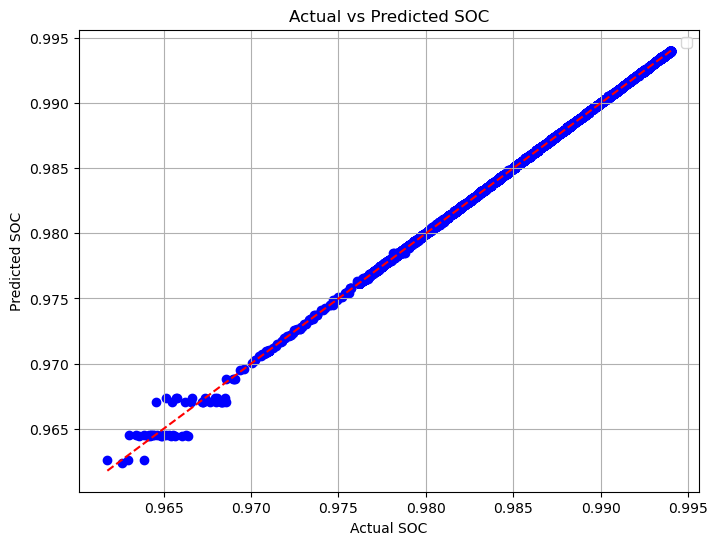

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Identity line
plt.xlabel('Actual SOC')
plt.ylabel('Predicted SOC')
plt.title('Actual vs Predicted SOC')
plt.grid()

plt.legend()
plt.show()

0:	learn: 0.0053088	test: 0.0052796	best: 0.0052796 (0)	total: 15.4ms	remaining: 15.4s
100:	learn: 0.0001170	test: 0.0001087	best: 0.0001087 (100)	total: 677ms	remaining: 6.02s
200:	learn: 0.0000899	test: 0.0000796	best: 0.0000796 (200)	total: 1.28s	remaining: 5.08s
300:	learn: 0.0000810	test: 0.0000700	best: 0.0000700 (300)	total: 1.86s	remaining: 4.31s
400:	learn: 0.0000767	test: 0.0000652	best: 0.0000652 (400)	total: 2.46s	remaining: 3.67s
500:	learn: 0.0000743	test: 0.0000626	best: 0.0000626 (500)	total: 3.03s	remaining: 3.02s
600:	learn: 0.0000729	test: 0.0000611	best: 0.0000611 (600)	total: 3.61s	remaining: 2.39s
700:	learn: 0.0000720	test: 0.0000601	best: 0.0000601 (700)	total: 4.19s	remaining: 1.79s
800:	learn: 0.0000715	test: 0.0000595	best: 0.0000595 (800)	total: 4.76s	remaining: 1.18s
900:	learn: 0.0000711	test: 0.0000591	best: 0.0000591 (900)	total: 5.35s	remaining: 588ms
999:	learn: 0.0000708	test: 0.0000588	best: 0.0000588 (999)	total: 5.91s	remaining: 0us

bestTest = 5.8

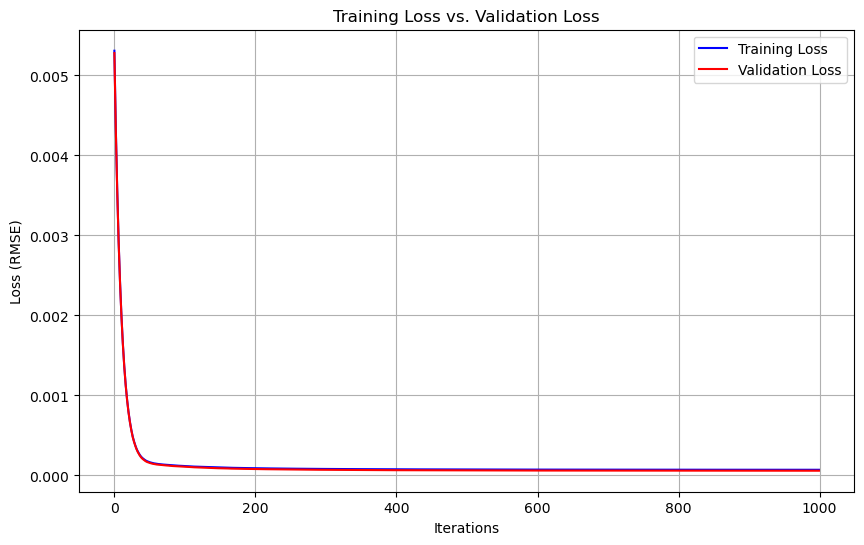

In [18]:
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100, plot=False)
evals_result = model.get_evals_result()
train_loss = evals_result['learn']['RMSE']
val_loss = evals_result['validation']['RMSE']

# Plotting training loss vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss (RMSE)')
plt.title('Training Loss vs. Validation Loss')
plt.legend()
plt.grid()
plt.savefig("valloss_catboost.png", format="png", dpi=300)
plt.show()